# Εργασία 2

Ερώτημα 1

In [1]:
# importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# loading the csv file of water potability I downloaded from Kaggle

df=pd.read_csv('water_potability.csv')

# checking the first 10 rows

print(df.head(10))


          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135   

Παρατηρώ πως κάποιες τιμές είναι κενές. Πχ pH, sulfate.

In [2]:
# describing the dataset

print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


Σύμφωνα με την περιγραφή του dataset ξέρω πως πρέπει να έχω συνολικά 3.276 δείγματα πόσιμου και μη πόσιμου νερού. Παρατηρώντας όμως το count αφού κάναμε describe τα δεδομένα, διαπιστώνω πως σε κάποια χαρακτηριστικά έχω λιγότερα δεδομένα. Όπως για παράδειγμα: 2.785 στο pH,  2.495 στο Sulfate και 3.114 στο Trihalomethanes.

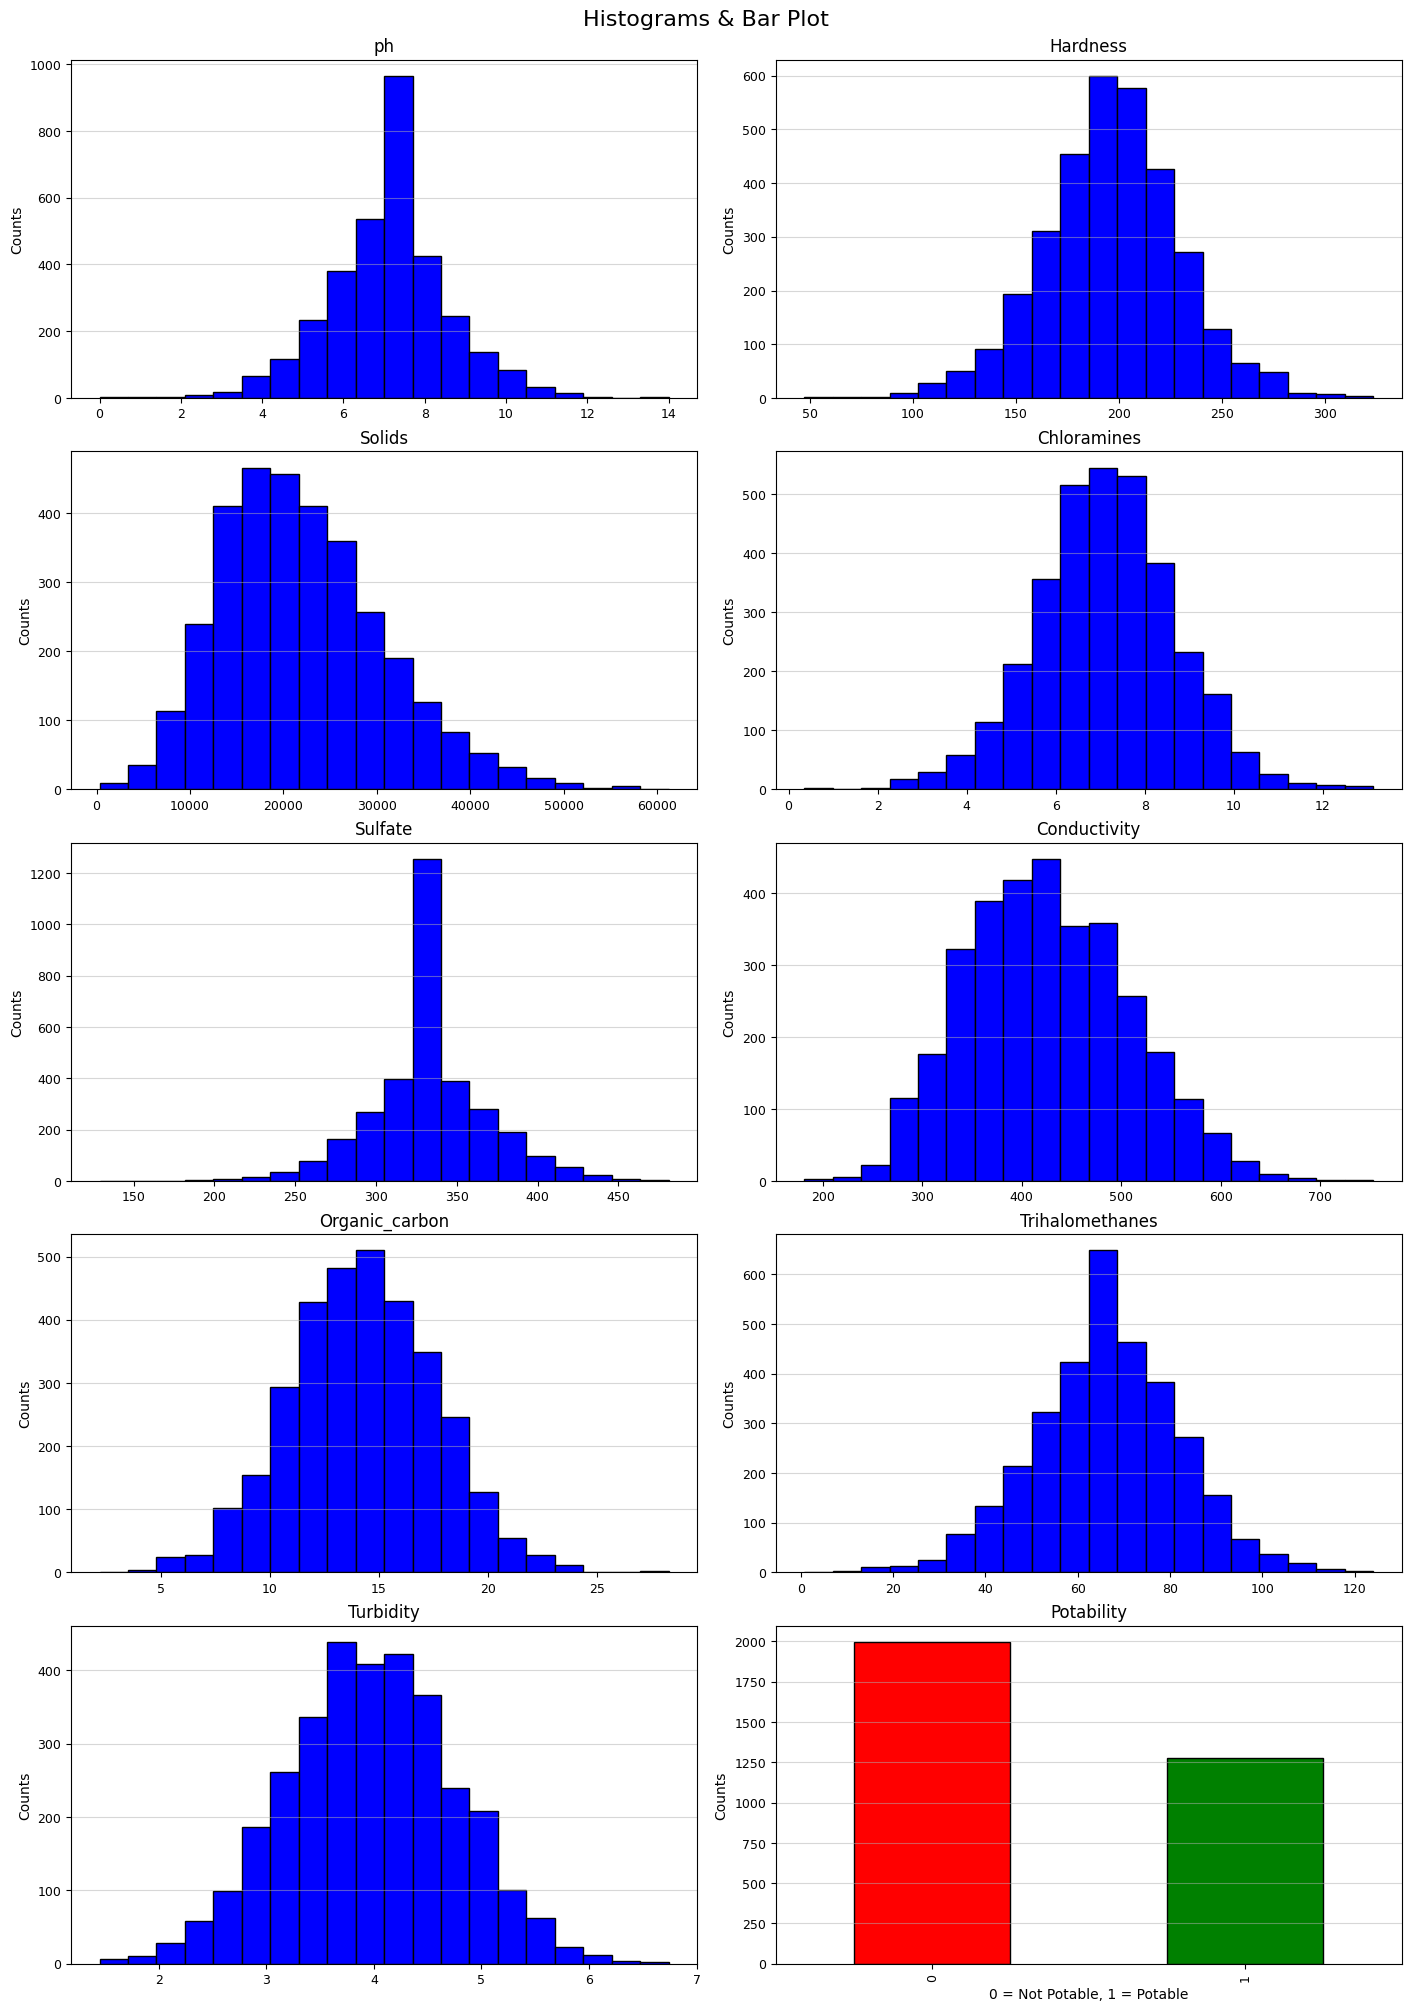

In [25]:
# creating histograms for each feature and then bar for potability
# first creating a variable for all features except potability

numeric_columns = df.columns[df.columns != "Potability"]

fig, axes = plt.subplots(5,2, figsize=(14,20), constrained_layout=True)
axes = axes.flatten()
fig.suptitle("Histograms & Bar Plot", fontsize=16)

for i, col in enumerate(numeric_columns):
     axes[i].hist(df[col], bins=20, color='blue', edgecolor='black')
     axes[i].set_title(f"{col}", fontsize=12)
     axes[i].set_ylabel("Counts", fontsize=10)
     axes[i].tick_params(axis='both', labelsize=9)
     axes[i].grid(axis='y', alpha=0.5)

outcome_ax = axes[len(numeric_columns)]
df['Potability'].value_counts().plot(kind='bar', color=['red', 'green'], edgecolor='black', ax=outcome_ax)
outcome_ax.set_title("Potability", fontsize=12)
outcome_ax.set_xlabel("0 = Not Potable, 1 = Potable", fontsize=10)
outcome_ax.set_ylabel("Counts", fontsize=10)
outcome_ax.tick_params(axis='both', labelsize=9)
outcome_ax.grid(axis='y', alpha=0.5)

plt.show()



In [4]:
# counting how many missing values exist in each column
for col in df.columns:
  missing_values = df[col].isna().sum()
  print(f"{col} has {missing_values} missing values")

ph has 491 missing values
Hardness has 0 missing values
Solids has 0 missing values
Chloramines has 0 missing values
Sulfate has 781 missing values
Conductivity has 0 missing values
Organic_carbon has 0 missing values
Trihalomethanes has 162 missing values
Turbidity has 0 missing values
Potability has 0 missing values


In [5]:
# checking the percentages of not potable (0) vs potable (1) water samples

potability_counts = df["Potability"].value_counts()
print(potability_counts)

Potability
0    1998
1    1278
Name: count, dtype: int64


In [6]:
percentages = df["Potability"].value_counts(normalize=True)*100
percentages.name = None
for val, percentage in percentages.items():
  print(f"{val}: {percentage:.2f}%")

0: 60.99%
1: 39.01%


Από αυτό το σύνολο δεδομένων λείπουν 491 τιμές από το pH, 781 από το Sulfate (θεικά άλατα) και 162 από το Trihalomethanes (τριχλωρομεθάνια). Συνολικά μας λείπουν 1.434 τιμές. Αυτό αποτελεί το 43% των δειγμάτων (1434/3276 *100%), σχεδόν δηλαδή το μισό dataset έχει κενές τιμές σε κάποια χαρακτηριστικά.
Παρόλο που η περιγραφή του συνόλου δεδομένων μας αναφέρει ότι τα το pH τους είναι στα όρια του πόσιμου νερού, κάτι τέτοιο δεν το παρατηρούμε για όλα τα δεδομένα κρίνοντας από το ιστόγραμμα πιο πάνω. Επομένως μπορούμε να συμπεράνουμε πως αυτές οι τιμές που λείπουν από το pH θα μπορούσαν κάλλιστα να ξεπερνούν τα όρια του ασφαλούς πόσιμου νερού. Επίσης, σχετικά με τα θεϊκά άλατα και τα τριχλωρομεθάνια, υπάρχουν και εκεί όρια σχετικά με το ποια πρέπει να είναι η συγκέντρωσή τους στο νερό ώστε αυτό να είναι ασφαλές για κατανάλωση, όρια που βλέπουμε να ξεπερνούνται σε κάποια δείγματα στο ιστόγραμμα του κάθε χαρακτηριστικού.
Συμπερασματικά, οι ελλείψεις των τιμών σε τόσο σημαντικές κατηγορίες μπορεί να επηρεάσουν την ποιότητα των δεδομένων.

Ερώτημα 2

In [7]:
# finding the percentages for each scenario: ph<6,5 , equal and in between 6,5 and 8,5 , and lastly ph>8,5

ph_below_6_5 = df[df['ph'] < 6.5]
potability_below_6_5 = ph_below_6_5['Potability'].value_counts(normalize=True) *100

for potability, perc in potability_below_6_5.items():
    print(f"ph < 6,5: {potability}: {perc:.2f}%")


ph_between_6_5_and_8_5 = df[df['ph'].between(6.5, 8.5)]
potability_between_6_5_and_8_5 = ph_between_6_5_and_8_5['Potability'].value_counts(normalize=True)*100

for potability, perc in potability_between_6_5_and_8_5.items():
    print(f'ph >= 6.5 and ph <= 8.5: {potability}: {perc:.2f}%')

ph_above_8_5 = df[df['ph']>8.5]
potability_above_8_5 = ph_above_8_5['Potability'].value_counts(normalize=True)*100

for potability, perc in potability_above_8_5.items():
    print(f'ph > 8.5: {potability}: {perc:.2f}%')

ph < 6,5: 0: 63.22%
ph < 6,5: 1: 36.78%
ph >= 6.5 and ph <= 8.5: 0: 56.10%
ph >= 6.5 and ph <= 8.5: 1: 43.90%
ph > 8.5: 0: 66.87%
ph > 8.5: 1: 33.13%


Αρχικά, για τα δείγματα νερού με pH κάτω του 6,5 παρατηρούμε πως το μεγαλύτερο μέρος τους (63,22%) δεν πίνεται. Αυτό ήταν αναμενόμενο, καθώς σε αυτές τις τιμές το νερό είναι όξινο.

Κατόπιν, για τα δείγματα νερού με pH μεταξύ του 6,5 και 8,5 παρατηρούμε πως το μεγαλύτερο μέρος τους (56,10%) δεν πίνεται. Αυτό μας κάνει να σκεφτούμε πως το pH ίσως να μην ευθύνεται εξολοκλήρου για την καταλληλότητα κατανάλωσης του νερού.

Τέλος, για τα δείγματα νερού με pH άνω του 8,5 παρατηρούμε πως το μεγαλύτερο μέρος τους (66,87%) επίσης δεν πίνεται. Αναμενόμενο, καθώς σε αυτές τις τιμές το νερό είναι αλκαλικό.





In [8]:
# finding the mean value of ph for all potable samples

potable = df[df['Potability'] ==1]
print(potable['ph'].mean())

7.0737832953812


Παρόλο που η πλειοψηφία των δειγμάτων νερού με pH μεταξύ 6,5 και 8,5 δεν πίνεται, διαπιστώνουμε ότι η μέση τιμή όλων των δειγμάτων νερού που πίνονται είναι γύρω στο 7. Το 7 βρίσκεται μεταξύ των 6,5 και 8,5 και ίσως έτσι να επαληθεύεται ως ένα βαθμό η ιδιότητα αυτή που έθεσε ο Παγκόσμιος Οργανισμός Υγείας περί προτινόμενων επιπέδων pH.

Ερώτημα 3

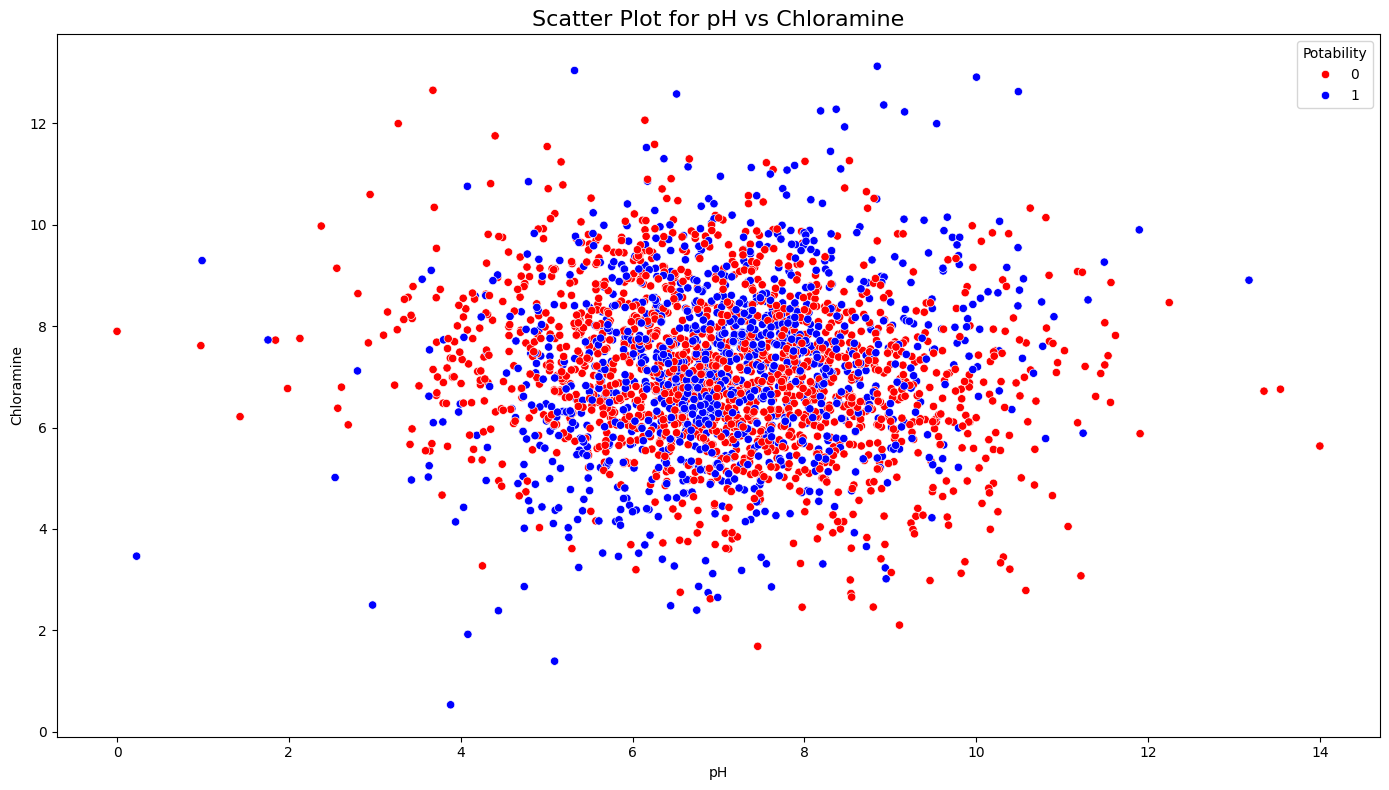

In [9]:
# creating a scatter plot for pH and Chloramines
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='ph', y='Chloramines', hue='Potability', palette={0: 'red', 1: 'blue'}, edgecolor='white')
plt.title("Scatter Plot for pH vs Chloramine", fontsize=16)
plt.xlabel("pH")
plt.ylabel("Chloramine")
plt.legend(title="Potability")
plt.tight_layout()
plt.show()

Διαχωρίζοντας τα δεδομένα με βάση το pH και την Chloramine σε ένα διάγραμμα διασποράς, όπου με μπλε χρώμα είναι τα πόσιμα και με κόκκινο τα μη πόσιμα παραδείγματα νερού, διαπιστώνουμε τα εξής.
Αρχικά, παρατηρούμε πως δεν ισχύει αυτό που λέει ο ΠΟΥ σχετικά με τα προτεινόμενα επίπεδα χλωραμίνης (μέχρι 4ppm), καθώς τα περισσότερα δείγματα με μπλε χρώμα, άρα και πόσιμα, βρίσκονται πάνω από το 4 στο διάγραμμα. Επίσης, αυτό που μας κάνει κατευθείαν αίσθηση είναι ότι τα περισσότερα δείγματα και των δύο χρωμάτων αλληλοκαλύπτονται, οπότε φαίνεται πως δεν υπάρχει σαφής διαχωρισμός. Τρίτον, βλέπουμε πως πόσιμα και μη πόσιμα δείγματα νερού υπάρχουν σε όλο το διάγραμμα διασποράς. Όλα αυτά μας οδηγούν στο συμπέρασμα ότι για τον διαχωρισμό των δεδομένων σε πόσιμα  και μη πόσιμα δεν αρκεί μόνο ο συνδιασμός pH και Chloramine.

Ερώτημα 4

In [10]:
# filling the missing values out

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

Ερώτημα 5

In [11]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

# splitting the data set into train set and test set with
# percentage 70-30% and using the random state as seed with value 0

seed=0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.shape, "train sets")
print(x_test.shape, "test sets")

(2293, 9) (2293,) (983, 9) (983,)
(2293, 9) train sets
(983, 9) test sets


Ερώτημα 6

In [12]:
# training the classifer (clf) Decision Tree (DT)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
# checking the accuracy of the train and test sets

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

accuracy_on_train = accuracy_score(y_train, y_pred_train)
accuracy_on_test = accuracy_score(y_test, y_pred_test)

accuracy_on_train_percentage = round(accuracy_on_train * 100, 2)
accuracy_on_test_percentage = round(accuracy_on_test * 100, 2)

print("Accuracy on train set", accuracy_on_train_percentage, "%")
print("Accuracy on test set", accuracy_on_test_percentage, "%")



Accuracy on train set 100.0 %
Accuracy on test set 57.48 %


Παρατηρούμε πως το μοντέλο έχει "τέλειο" ποσοστό ακρίβειας στα δεδομένα εκπαίδευσης 100%, ενώ στα δεδομένα ελέγχου έχει πάνω από το μισό (57,48%). Αυτό είναι αποτέλεσμα υπερπροσαρμογής (overfitting) και δεν είναι καλό. Αυτό που συνέβη εδώ ουσιαστικά είναι το μοντέλο να εκπαιδευτεί στο να βγάζει τέλεια αποτελέσματα στο σετ με τα δεδομένα εκπαίδευσης, ενώ δυσκολεύεται να γενικεύσει και να βγάλει σωστά αποτελέσματα για τα νέα δεδομένα. Έμαθε απέξω τα δείγματα του σετ εκπαίδευσης, χωρίς να μάθει κάποιο μοτίβο που θα το βοηθήσει να προβλέψει τα δείγματα του test set.
Για να λύσουμε το πρόβλημα είτε κάνουμε μείωση των χαρακτηριστικών είτε κανονικοποίηση, δηλαδή έχοντας τον ίδιο αριθμό χαρακτηριστικών με την αρχή, μειώνουμε την βαρύτητά τους.

Ερώτημα 7

In [14]:
# creating a list for our results

results = []

# showing our parameter list

criterion = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
ccp_alpha = [0.0, 0.01]

# using a for loop

for crtrn in criterion:
    for mx_dpth in max_depth:
        for mn_smpls_splt in min_samples_split:
            for mn_smpls_lf in min_samples_leaf:
                for mx_ftrs in max_features:
                    for cst_cmplxt_prnng in ccp_alpha:
                        new_tree_clf = DecisionTreeClassifier(
                            criterion=crtrn,
                            max_depth=mx_dpth,
                            min_samples_split=mn_smpls_splt,
                            min_samples_leaf=mn_smpls_lf,
                            max_features=mx_ftrs,
                            ccp_alpha=cst_cmplxt_prnng,
                            random_state=0
                        )
                        new_tree_clf.fit(x_train, y_train)

                        # checking the accuracy on test-train data sets

                        train_acc = accuracy_score(y_train, new_tree_clf.predict(x_train))
                        test_acc = accuracy_score(y_test, new_tree_clf.predict(x_test))


                        # putting the results in our list
                        results.append({
                            'criterion': crtrn,
                            'max_depth': mx_dpth,
                            'min_samples_split': mn_smpls_splt,
                            'min_samples_leaf': mn_smpls_lf,
                            'max_features': mx_ftrs,
                            'ccp_alpha': cst_cmplxt_prnng,
                            'train_acc': train_acc,
                            'test_acc': test_acc
                        })


In [15]:
# creating a table for our results

results_table = pd.DataFrame(results)
print(results_table)

   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    ccp_alpha  train_acc  test_acc  
0        0.00   1.000000  0.574771  
1

Παρατηρούμε πως σε κάποιες περιπτώσεις τα ποσοστά ακρίβειας εκπαίδευσης και ελέγχου δεδομένων είναι κοντινά.

Ερώτημα 8

In [16]:
# finding the combination with the best accuracy on test when max_depth = 3
subset = results_table[results_table["max_depth"] == 3]

best_combo = subset.sort_values(by="test_acc", ascending=False).iloc[0]

print(best_combo)

criterion             entropy
max_depth                 3.0
min_samples_split           5
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_acc            0.641082
test_acc             0.639878
Name: 72, dtype: object


In [17]:
# now we are training the classifier on the best_combo

best_combo_tree_clf = DecisionTreeClassifier(
    criterion=best_combo['criterion'],
    max_depth=int(best_combo['max_depth']),
    min_samples_split=int(best_combo['min_samples_split']),
    min_samples_leaf=int(best_combo['min_samples_leaf']),
    max_features=best_combo['max_features'],
    ccp_alpha=float(best_combo['ccp_alpha']),
    random_state=0
)
best_combo_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       random_state=0)

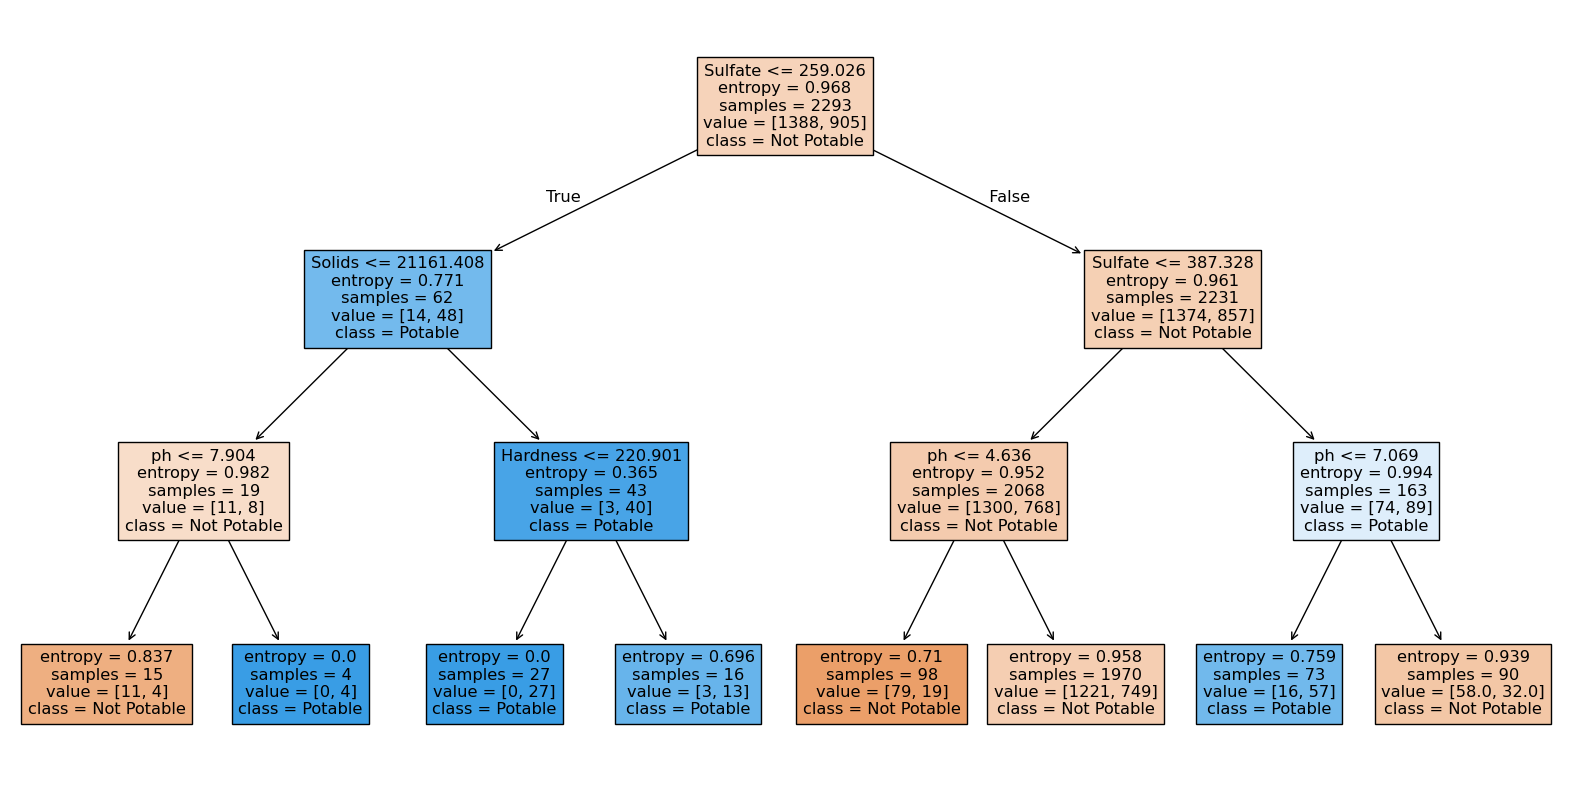

In [18]:
# constructing the Decision Tree based on the best_combo

plt.figure(figsize=(20,10))
plot_tree(best_combo_tree_clf, filled=True, feature_names=df.columns[:-1], class_names=['Not Potable', 'Potable'])
plt.show()

Οι κανόνες που εξήγαγε το δέντρο είναι οι εξής:
1. Αν το Sulfate είναι μικρότερο ή ίσο του 259.026 και το Solids μικρότερο η ίσο του 21161.408 και το pH μεγαλύτερο του 7.904, τότε το νερό είναι πόσιμο. Διαφορετικά, αν το pH είναι μικρότερο ή ίσο του 7.904 το νερό δεν πίνεται.
2. Αν το Sulfate είναι μικρότερο ή ίσο του 259.026 και το Solids μεγαλύτερο του 21161.408 και όποιο και να είναι το Hardnewss το νερό πίνεται.
3. Αν το Sulfate είναι μεγαλύτερο του 259.026 και μικρότερο ή ίσο του 387.328, τότε όποια τιμή και να έχει το pH, το νερό δεν είναι πόσιμο.
4. Αν το Sulfate είναι μεγαλύτερο του 259.026 και μεγαλύτερο του 387.328, αν το pH είναι μικρότερο ή ίσο του 7.069, το νερό πίνεται. Διαφορεικά αν το pH είναι μεγαλύτερο του 7.069 το νερό δεν είναι πόσιμο.

Γενικά βλέπουμε πως το δέντρο χρησιμοποιεί πολλά χαρακτηριστικά για να κατηγοριοποιήσει το νερό σε πόσιμο και μη πόσιμο, πράγμα που το καθιστά πιο αξιόπιστο.

Ερώτημα 9

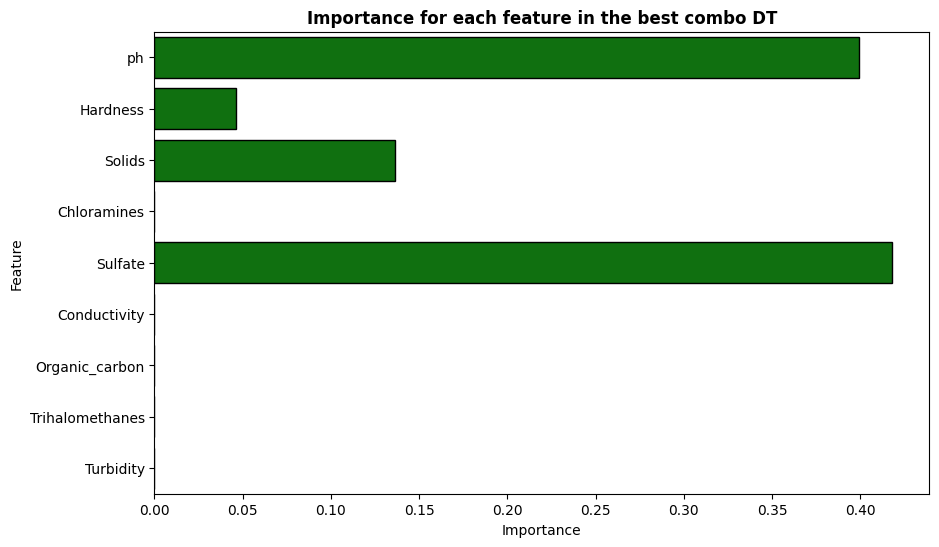

In [19]:
# finding how much important each feature is

feature_importances = best_combo_tree_clf.feature_importances_

# now creating the bar plot for them

features = df.columns[:-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, color="green", edgecolor="black")
plt.title('Importance for each feature in the best combo DT', fontweight="bold")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [20]:
# finding the exact values

feature_importances_df=pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(feature_importances_df)


           Feature  Importance
4          Sulfate    0.418179
0               ph    0.398931
2           Solids    0.136534
1         Hardness    0.046356
3      Chloramines    0.000000
5     Conductivity    0.000000
6   Organic_carbon    0.000000
7  Trihalomethanes    0.000000
8        Turbidity    0.000000


Παρατηρούμε ότι τα χαρακτηριστικά με την μεγαλύτερη σημαντικότητα είναι τα εξής:

1. Sulfate με 0.418
2. pH με 0.398
3. Solids με 0.135
4. Hardness με 0.046

Τα υπόλοιπα έχουν σημαντικότητα 0.

Παρατηρούμε πως αυτά τα 4 χαρακτηριστικά είναι αυτά που χρησιμοποίησε το δέντρο απόφασης για να καταλήξει στις κλάσεις potable και not potable.


Αν η συσκευή μπορεί να υποστηρίζει μέχρι 5 χημικές αναλύσεις τότε θα έπρεπε προφανώς να εξάγει τις τιμές από τα παραπάνω 4 χαρακτηριστικά (sulfate, ph, solids, hardness). Το hardness παρόλο που έχει την μικρότερη σημαντικότητα από τα 4, είναι και αυτό σημαντικό για την αξιολόγηση της ποιότητας του νερού. Τα υπόλοιπα, τα οποία και δεν χρησιμοποιήθηκαν καν στο best combo δέντρο απόφασης, έχουν μηδενική σημαντικότητα, οπότε δεν συμβάλλουν καθόλου στην απόφαση αν το νερό είναι πόσιμο ή όχι.

Ερώτημα 10

Ένα Random Forest ενδεχομένως να πετύχαινε καλύτερη ακρίβεια από το Δέντρο Απόφασης για τους εξής λόγους:
1. Έχει μεγάλη αποδότικότητα με μεγάλες βάσεις δεδομένων, και στην συγκεκριμένη έχουμε 3.276 δείγματα.
2. Διαχειρίζεται αποτελεσματικά τις missing values, και σε αυτό το dataset εμείς έχουμε 1.434 κενές τιμές.
3. Δεν κάνει overfitting αν τα δεδομένα είναι καλά.
4. Γενικά, πολλά δέντρα μαζί προσφέρουν ποικιλομορφία και αν κάποια έχουν λάθος πρόβλεψη, υπάρχουν πολλά άλλα που υπολογίζουν σωστά. Επομένως συνολικά το αποτέλεσμα θα κινηθεί προς τη σωστή κατεύθυνση.
Αυτή είναι και η βασική ιδέα πίσω από αυτόν τον αλγόριθμο, ότι όταν ένα μεγάλο σύνολο από δένδρα που δεν συσχετίζονται μεταξύ τους αποφασίζουν από κοινού, η απόφαση που θα πάρουν θα είναι καλύτερη από κάθε δένδρο ξεχωριστά.

Ερώτημα 11

In [22]:
# creating a new list for our results
results2 = []

n_estimators = [50, 100, 200]
criterion = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
ccp_alpha = [0.0, 0.01]

for est in n_estimators:
  for crtrn in criterion:
    for mx_dpth in max_depth:
      for mn_smpls_splt in min_samples_split:
        for mn_smpls_lf in min_samples_leaf:
          for mx_ftrs in max_features:
            for cst_cmplxt_prnng in ccp_alpha:
              rf_clf = RandomForestClassifier(
                  n_estimators = est,
                  criterion=crtrn,
                  max_depth=mx_dpth,
                  min_samples_split=mn_smpls_splt,
                  min_samples_leaf=mn_smpls_lf,
                  max_features=mx_ftrs,
                  ccp_alpha=cst_cmplxt_prnng,
                  random_state=0)

            rf_clf.fit(x_train, y_train)
            # checking the accuracy on test-train data sets
            train_acc = accuracy_score(y_train, rf_clf.predict(x_train))
            test_acc = accuracy_score(y_test, rf_clf.predict(x_test))
            # putting the results in our list
            results2.append({
                      'n_estimators': est,
                      'criterion': crtrn,
                      'max_depth': mx_dpth,
                      'min_samples_split': mn_smpls_splt,
                      'min_samples_leaf': mn_smpls_lf,
                      'max_features': mx_ftrs,
                      'ccp_alpha': cst_cmplxt_prnng,
                      'train_acc': train_acc,
                      'test_acc': test_acc
                      })


In [23]:
results2_table = pd.DataFrame(results2)
print(results2_table)

     n_estimators criterion  max_depth  min_samples_split  min_samples_leaf  \
0              50      gini        NaN                  2                 1   
1              50      gini        NaN                  2                 1   
2              50      gini        NaN                  2                 2   
3              50      gini        NaN                  2                 2   
4              50      gini        NaN                  5                 1   
..            ...       ...        ...                ...               ...   
139           200   entropy        5.0                  2                 2   
140           200   entropy        5.0                  5                 1   
141           200   entropy        5.0                  5                 1   
142           200   entropy        5.0                  5                 2   
143           200   entropy        5.0                  5                 2   

    max_features  ccp_alpha  train_acc  test_acc  


Παρατηρούμε πως το τυχαίο δάσος έχει παρόμοια ακρίβεια στα δεδομένα εκπαίδευσης με τα δεδομένα ελέγχου.

Ερώτημα 12

Ανάμεσα στις εξής δύο επιλογές:α) η εφαρμογή να προβλέπει καλά το πόσιμο νερό, αλλά να χάνει ακρίβεια από το μη-πόσιμο, και β) η εφαρμογή να προβλέπει καλύτερα το μη-πόσιμο νερό, αλλά να χάνει ακρίβεια από το πόσιμο, η καλύτερη είναι η δεύτερη.
Αν η εφαρμογή προβλέπει ότι το νερό είναι πόσιμο, ενώ δεν είναι, τότε υπάρχει πιθανότητα να κινδυνεύσει η υγεία αυτού που θα το πιει. Από την άλλη, αν η εφαρμογή προβλέπει ότι το πόσιμο νερό είναι μη πόσιμο, τότε θα οδηγηθούμε στο πέταγμά του και γενικά στην σπατάλη τόσο σημαντικών πόρων. Ωστόσο, όσο σημαντικό και να είναι το νερό, η υγεία ενός ανθρώπου είναι πιο σημαντική, οπότε η καλύτερη επιλογή είναι το β.

Ερώτημα 13

Νομικά ασφαλέστερο για μια εταιρεία είναι να χρησιμοποιήσει το καλύτερο δέντρο απόφασης σε αντίθεση με το καλύτερο τυχαίο δάσος. Αυτό συμβαίνει διότι παρόλο που το τυχαίο δάσος ίσως προβλέπει πιο σωστά από το δέντρο δεν γίνεται να το ερμηνεύσουμε. Αντίθετα ένα δέντρο έχει μεγάλη ερμηνευσιμότητα. Γενικότερα μας ενδιαφέρει το γιατί συμβαίνει κάτι περισσότερο από την πρόβλεψη του τι θα συμβεί.